![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Ridgeline plot
</b>
</span>

---
**Notebook version**: `1` (18 Mar 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Make a ridge plot from time series data with `.ridgeline()`
- This example uses half-hourly air temperature data from 2019
- The ridgeline plot usses the kernel density estimator from scikit-learn, see here:
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html
    - https://scikit-learn.org/stable/modules/density.html#kernel-density

</br>

# **Imports**

In [1]:
import diive as dv

# Dependencies for this notebook
import importlib.metadata
from datetime import datetime
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Load example data**

In [2]:
df = load_exampledata_parquet()
ta = df['Tair_f'].copy()
ta

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.238 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618
2013-01-01 00:45:00   -1.630
2013-01-01 01:15:00   -1.644
2013-01-01 01:45:00   -1.657
2013-01-01 02:15:00   -0.567
                       ...  
2022-12-31 21:45:00    3.463
2022-12-31 22:15:00    5.283
2022-12-31 22:45:00    5.537
2022-12-31 23:15:00    4.963
2022-12-31 23:45:00    6.490
Freq: 30min, Name: Tair_f, Length: 175296, dtype: float64

</br>

# **Ridgeline plot per month**

## Example data for one year (2019)

In [3]:
series = ta.loc[ta.index.year == 2019].copy()
series

TIMESTAMP_MIDDLE
2019-01-01 00:15:00   -3.380
2019-01-01 00:45:00   -3.357
2019-01-01 01:15:00   -3.607
2019-01-01 01:45:00   -3.890
2019-01-01 02:15:00   -4.003
                       ...  
2019-12-31 21:45:00   -2.440
2019-12-31 22:15:00   -2.447
2019-12-31 22:45:00   -2.455
2019-12-31 23:15:00   -2.463
2019-12-31 23:45:00   -2.470
Freq: 30min, Name: Tair_f, Length: 17520, dtype: float64

## Make plot

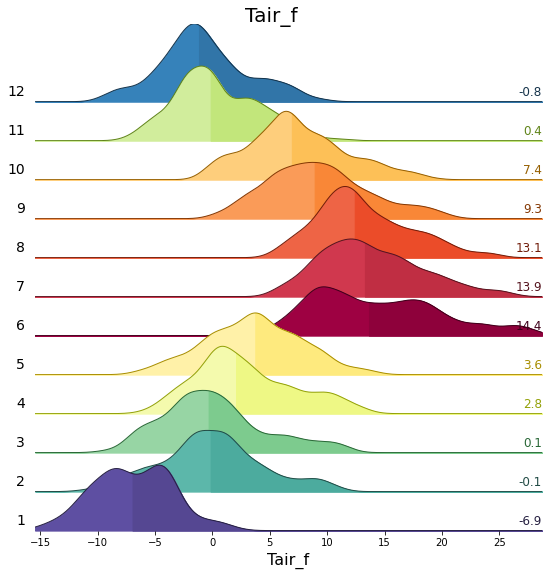

In [4]:
rp = dv.ridgeline(series=series)  # Init RidgePlotTS instance
rp.plot(how="monthly")

</br>

# **Ridgeline plot per year**

## Example data for 10 years (2013-2022)

In [5]:
ta

TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618
2013-01-01 00:45:00   -1.630
2013-01-01 01:15:00   -1.644
2013-01-01 01:45:00   -1.657
2013-01-01 02:15:00   -0.567
                       ...  
2022-12-31 21:45:00    3.463
2022-12-31 22:15:00    5.283
2022-12-31 22:45:00    5.537
2022-12-31 23:15:00    4.963
2022-12-31 23:45:00    6.490
Freq: 30min, Name: Tair_f, Length: 175296, dtype: float64

## Make plot

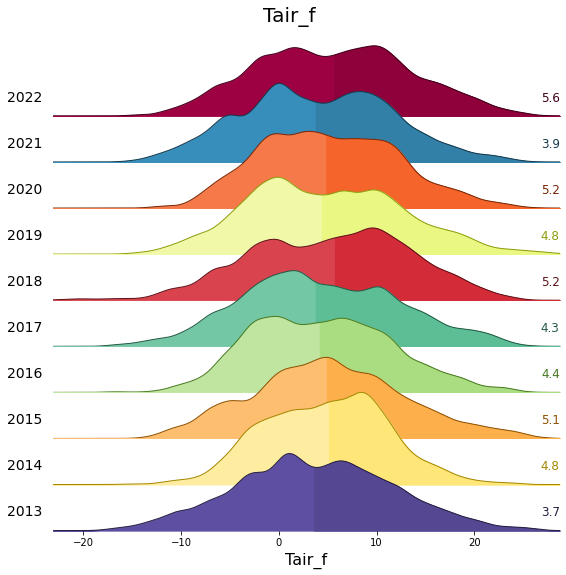

In [6]:
rp = dv.ridgeline(series=ta)
rp.plot(how="yearly")

</br>

# **Ridgeline plot per week**

## Example data for one year (2019)

In [7]:
series = ta.loc[ta.index.year == 2019].copy()
series

TIMESTAMP_MIDDLE
2019-01-01 00:15:00   -3.380
2019-01-01 00:45:00   -3.357
2019-01-01 01:15:00   -3.607
2019-01-01 01:45:00   -3.890
2019-01-01 02:15:00   -4.003
                       ...  
2019-12-31 21:45:00   -2.440
2019-12-31 22:15:00   -2.447
2019-12-31 22:45:00   -2.455
2019-12-31 23:15:00   -2.463
2019-12-31 23:45:00   -2.470
Freq: 30min, Name: Tair_f, Length: 17520, dtype: float64

## Make plot

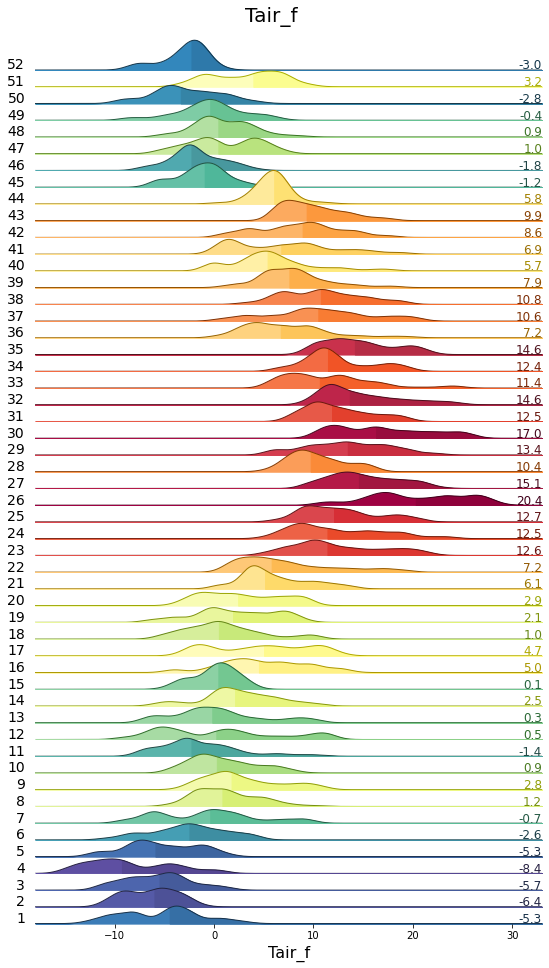

In [8]:
rp = dv.ridgeline(series=series)
rp.plot(how="weekly", fig_height=14, xlim=[-18, 33])

</br>

# **Ridgeline plot per month** with full parameters

## Example data for one year (2019)

In [9]:
series = ta.loc[ta.index.year == 2019].copy()
series

TIMESTAMP_MIDDLE
2019-01-01 00:15:00   -3.380
2019-01-01 00:45:00   -3.357
2019-01-01 01:15:00   -3.607
2019-01-01 01:45:00   -3.890
2019-01-01 02:15:00   -4.003
                       ...  
2019-12-31 21:45:00   -2.440
2019-12-31 22:15:00   -2.447
2019-12-31 22:45:00   -2.455
2019-12-31 23:15:00   -2.463
2019-12-31 23:45:00   -2.470
Freq: 30min, Name: Tair_f, Length: 17520, dtype: float64

## Make plot

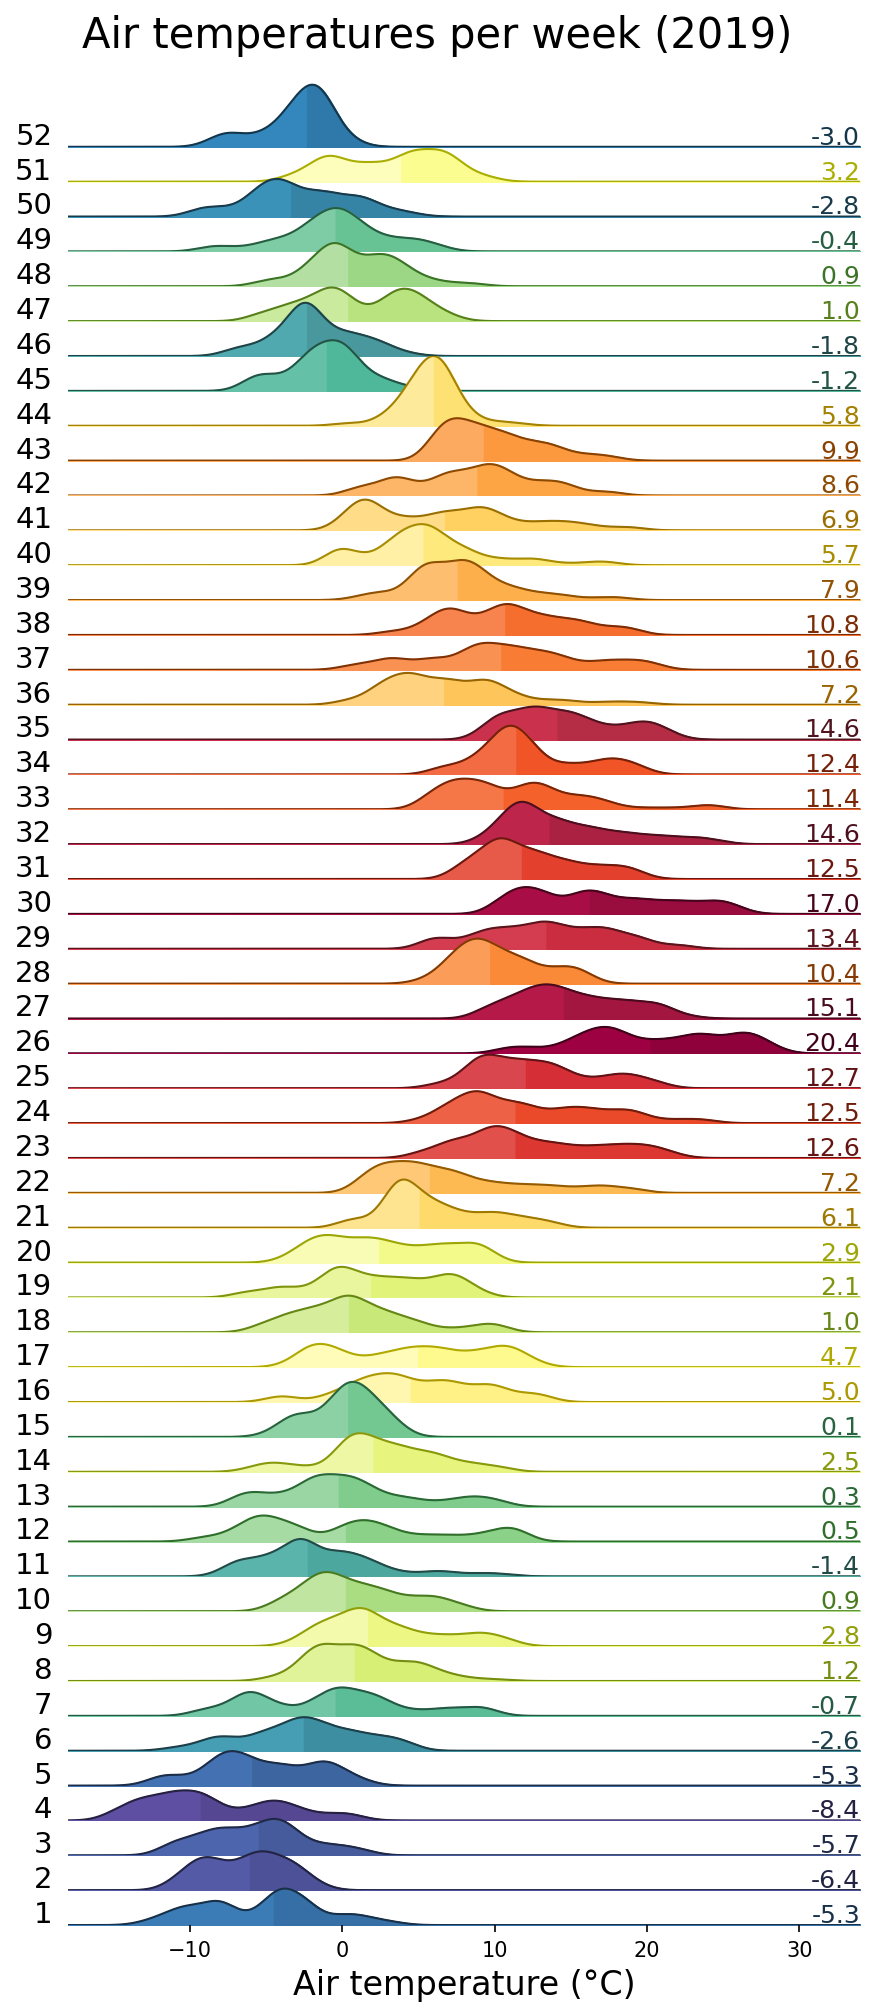

In [10]:
rp = dv.ridgeline(series=series)
rp.plot(
    how="weekly",
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=[-18, 34],  # min/max as list
    ylim=None,  # min/max as list
    hspace=-0.5,  # overlap between months
    xlabel=r'Air temperature (°C)',    
    fig_width=6,
    fig_height=14,
    shade_percentile= 0.5,
    show_mean_line=False,
    fig_title= "Air temperatures per week (2019)",
    fig_dpi=150,
    showplot=True,
    ascending=False
)

## Make plot with additional parameters for KernelDensity
- `kd_kwargs` are parameters that are passed to scikit-learn's KernelDensity estimator, for options see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

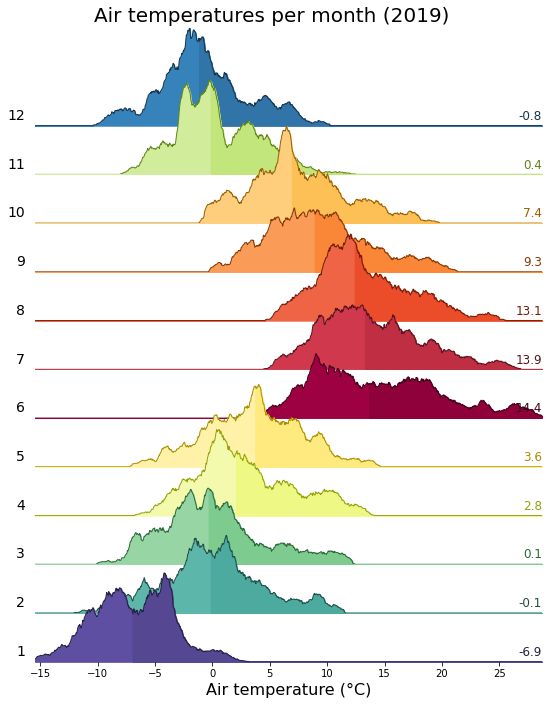

In [11]:
rp = dv.ridgeline(series=series)
rp.plot(
    how="monthly",
    kd_kwargs={'bandwidth': 0.5, 'kernel': 'tophat'},  # params from scikit KernelDensity as dict
    xlim=None,  # min/max as list
    ylim=None,  # min/max as list
    hspace=-0.5,  # overlap between months
    xlabel=r'Air temperature (°C)',    
    fig_width=8,
    fig_height=10,
    shade_percentile= 0.5,
    show_mean_line=False,
    fig_title= "Air temperatures per month (2019)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Get parameter settings

In [12]:
rp.kde.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 0.5,
 'breadth_first': True,
 'kernel': 'tophat',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

## Get figure object

In [13]:
# fig = rp.get_fig()
# fig

</br>

# **End of notebook**

In [14]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-05-16 22:44:24
